# Travel Package Purchase Prediction

# 1. Problem Statement

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

 In this notebook, I am using the models based on ensemble techniques(bagging, boosting & stacking) to predict whether a customer will buy newly introduced travel package or not. The dataset contains various independent variables such as `Age`, `MonthlyIncome`, `Designation`, `MaritalStatus` etc. that are being analyzed. The data will be trained by these models and evaluated with different improvement strategies for accuracy 

## Objective:

**The dataset aims to answer the following key questions:**

* Identify different factors that influence the customer to purchase the newly introduced travel package.
* Build a prediction model that help  "Visit with us" in targeting right segment of customers to expand the customer base


## Data Dictionary:

### Customer details:
* CustomerID: Unique customer ID
* ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are * ordered i.e. Tier 1 > Tier 2 > Tier 3
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of trips in a year by customer
* Passport: The customer has a passport or not (0: No, 1: Yes)
* OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer

### Customer interaction data: 
* PitchSatisfactionScore: Sales pitch satisfaction score
* ProductPitched: Product pitched by the salesperson
* NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
* DurationOfPitch: Duration of the pitch by a salesperson to the customer


## Index

- <a href = #link1># Loading libraries </a>


- <a href = #link2># Loading and exploring the data </a> 


- <a href = #link3># Data Pre-processing</a>


- <a href = #link4># Data Exploratory Analysis </a> 


- <a href = #link5># Outlier Treatment</a>


- <a href = #link6># Model Building</a>


- <a href = #link7># Bagging Models</a>


- <a href = #link8># Boosting Models</a>


- <a href = #link9># Business Recommendations</a>

# 2. <a id = "link1"></a>Loading libraries

In [171]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.impute import KNNImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

import missingno as msno

# 3. <a id = "link2"></a>Loading and exploring the data
In this section the goal is to load the data into dataframe and check its basic properties. This will include the dimension, column types and names, and missingness counts.

In [172]:
travel = pd.read_excel ('Tourism.xlsx', sheet_name = 'Tourism')
df = travel.copy() # copying to a another dataframe to keep the original dataframe intact to refer back

In [173]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [174]:
df.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


The column `ProdTaken` is the target variable for prediction and rest of the columns are independent variables. The data include customer demographic information (age, income,gender, occupation, marital status etc.), the customer's interaction with the "Visit with us" (Productpitched, number of followups, pitch satisfaction score etc.), and the customer's response to the last product pitched(ProdTaken).From the random 5 head and tail rows, I see few missing values in `age` but needs futher investigation to check the data quality.

In [175]:
df.shape
print("Dataset contains", df.shape[0], "rows of customer information")

Dataset contains 4888 rows of customer information


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

Dataset contains Int, float and object types. We will look at the data type conversion if needed at later stage.

In [177]:
pd.DataFrame(
    data={
        "% of Missing Values": round(df.isna().sum() / df.isna().count() * 100, 2)
    }
)

,% of Missing Values
CustomerID,0.00
ProdTaken,0.00
Age,4.62
TypeofContact,0.51
CityTier,0.00
DurationOfPitch,5.14
Occupation,0.00
Gender,0.00
NumberOfPersonVisiting,0.00
NumberOfFollowups,0.92


It appears that `Age`, `TypeofContact`, `DurationofPitch`, `NumberOfFollowups`, `PreferredPropertyStar`, `NumberOfTrips`, `NumberOfChildrenVisiting`, `MonthlyIncome` have missing values that need to treated(impute or delete)

In [178]:
df.apply(lambda x: len(x.unique()))

CustomerID                  4888
ProdTaken                      2
Age                           45
TypeofContact                  3
CityTier                       3
DurationOfPitch               35
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              7
ProductPitched                 5
PreferredPropertyStar          4
MaritalStatus                  4
NumberOfTrips                 13
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       5
Designation                    5
MonthlyIncome               2476
dtype: int64

The `CustomerID` column does not add any interesting information. There is no association between customer ID and ProdTaken, also it does not provide any general conclusion for future potential travel customers. We can ignore this column for our model prediction.

In [179]:
# Making a list of all binary variables
bin_col = df.drop(['CustomerID'], axis=1)
bin_col = bin_col.columns

# Printing number of count of each unique value in each column
for column in bin_col:
    print(column)
    print(df[column].value_counts())
    print("-" * 50)

ProdTaken
0    3968
1     920
Name: ProdTaken, dtype: int64
--------------------------------------------------
Age
35.0    237
36.0    231
34.0    211
31.0    203
30.0    199
32.0    197
33.0    189
37.0    185
29.0    178
38.0    176
41.0    155
39.0    150
28.0    147
40.0    146
42.0    142
27.0    138
43.0    130
46.0    121
45.0    116
26.0    106
44.0    105
51.0     90
47.0     88
50.0     86
25.0     74
52.0     68
53.0     66
48.0     65
49.0     65
55.0     64
54.0     61
56.0     58
24.0     56
22.0     46
23.0     46
59.0     44
21.0     41
20.0     38
19.0     32
58.0     31
60.0     29
57.0     29
18.0     14
61.0      9
Name: Age, dtype: int64
--------------------------------------------------
TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
--------------------------------------------------
CityTier
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
--------------------------------------------------
DurationOfPitch


Among these 4888 customers, only 920 (= `18%`) had purchased the package that was offered to them in the earlier campaign. `62%` own cars. `65%` are from tier 1 city. `70%` of customers contacted through self-enquiry. Data indicate there are lot of opportunities to expand the customer base.

# 4. <a id = "link3"></a>Data Pre-processing

<AxesSubplot:>

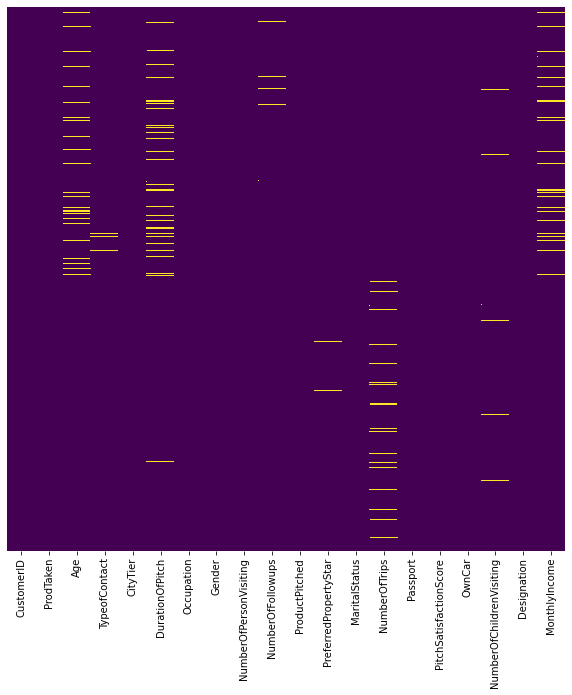

In [180]:
plt.figure(figsize = (10,10))
sns.heatmap(df.isna(), cbar = False, cmap = 'viridis', yticklabels = False)

<AxesSubplot:>

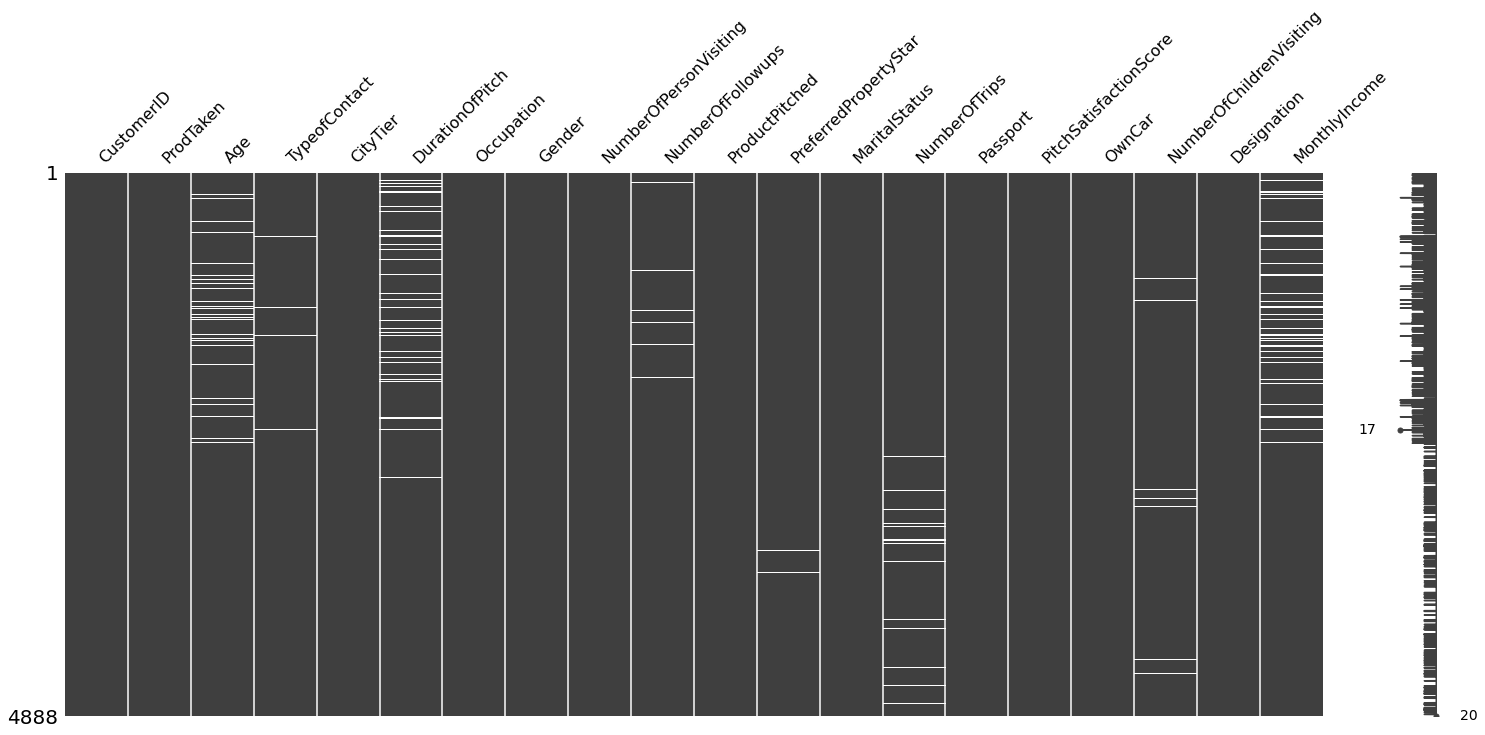

In [181]:
msno.matrix(df)

Above heatmap shows the columns having missing values with variation in occurrence. `Age`, `TypeofContact`, `DurationOfpitch` have missing values in the begining part. `NumberOfTrips` have missing values in the ending part.`PreferredPropertyStar`have few missing values.

#### 4.1 Age
`Age` has 4.62% missing values that needs to be treated. I am using simpleimputer to treat the missing values by taking mean values of Age. Also, `Age` does not have decimal values, this can be converted to int from float.

In [182]:
imr = SimpleImputer(missing_values= np.nan, strategy='mean')
imr = imr.fit(df[['Age']])
df['Age'] = imr.transform(df[['Age']]).ravel()

#### 4.2 Type of Contact & No of follow ups
Since there is only .51% missing values for type of contact and .93% for no of follow ups, we can drop the rows with null values

In [183]:
df = df[df['TypeofContact'].notna()]
df = df[df['NumberOfFollowups'].notna()] 

#### 4.3 Duration of Pitch
`DurationOfPitch` have 5.14% missing values. I am using simpleimputer to treat the missing values by taking mean values of Duration of Pitch.

In [184]:
imr = SimpleImputer(missing_values= np.nan, strategy='mean')
imr = imr.fit(df[['DurationOfPitch']])
df['DurationOfPitch'] = imr.transform(df[['DurationOfPitch']]).ravel()

#### 4.4 Preferred property star
I am using group level imputer with Designation and taking median Preferred property star.

In [185]:
df["PreferredPropertyStar"] = df.groupby(["Designation"])["PreferredPropertyStar"].transform(
 lambda x: x.fillna(x.median()))

#### 4.5 Number of trips
I am using group level imputer with Age and taking mean number of trips

In [186]:
df["NumberOfTrips"] = df.groupby(["Age" ])["NumberOfTrips"].transform(
 lambda x: x.fillna(x.mean()))

#### 4.6 Number of children visiting
`NumberofChildrenVisiting` have 1.35% missing values. Since most of these customers are either single, unmarried or divorced, we can replace it with 0

In [187]:
df['NumberOfChildrenVisiting'] = df['NumberOfChildrenVisiting'].fillna(0)

#### 4.7 Monthly Income
`MonthlyIncome` have 4.74% missing values. I am using simpleimputer to treat the missing values by taking median values of MonthlyIncome.

In [188]:
imr = SimpleImputer(missing_values= np.nan, strategy='median')
imr = imr.fit(df[['MonthlyIncome']])
df['MonthlyIncome'] = imr.transform(df[['MonthlyIncome']]).ravel()

#### 4.8 Gender
There seems to be a data entry error with the gender column with values 'Fe Male'. Need to convert it to 'Female'

In [189]:
df['Gender'] = df['Gender'].replace("Fe Male", "Female")

#### 4.9 Occupation
Since there are only 2 rows with occupation 'Freelancer' we can drop these 2 rows

In [190]:
df.drop(df.loc[df['Occupation']=='Free Lancer'].index, inplace=True) 

# 5. <a id = "link4"></a>Data Exploratory Analysis

In [191]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4816.0,202458.378115,1411.411053,200000.0,201237.75,202473.5,203681.25,204887.0
ProdTaken,4816.0,0.188331,0.391017,0.0,0.00,0.0,0.00,1.0
Age,4816.0,37.670605,9.095030,18.0,31.00,37.0,43.00,61.0
CityTier,4816.0,1.651993,0.915851,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4816.0,15.509007,8.334531,5.0,9.00,14.0,19.00,127.0
NumberOfPersonVisiting,4816.0,2.911960,0.723823,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4816.0,3.710341,1.000823,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4816.0,3.578488,0.796974,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4816.0,3.253776,1.821727,1.0,2.00,3.0,4.00,22.0
Passport,4816.0,0.292982,0.455177,0.0,0.00,0.0,1.00,1.0


* Mean and Median `Age` of customers are almost equal(37 years). There is a big customer age range, between 18 and 61 years.
* `DurationOfPitch` is between 5 and 127 hours, which appears to be right-skewed, 75% of durationpitch is below 19 hours.
* `MonthlyIncome` is between 1000 and 98678, which appears to be right-skewed, meaning 75% of the customers income are below 25475
* 50% of customers are from tier 1 city
* Half of the customers own a car

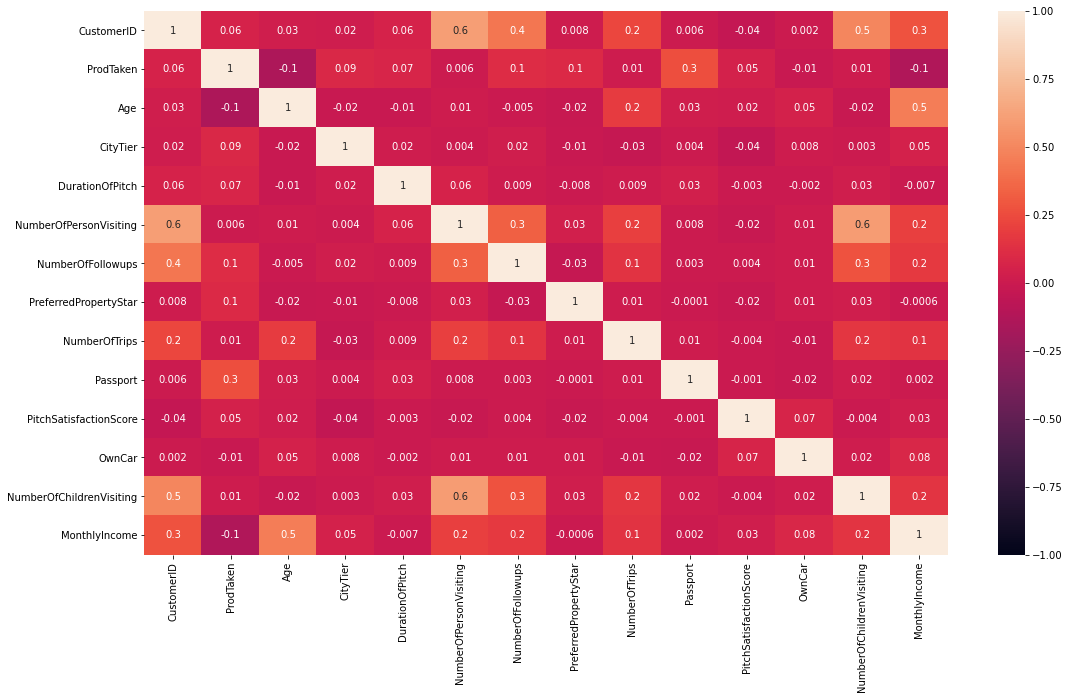

In [192]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.1g')
plt.show()

* `ProdTaken` and `Passport` have strong positive correlation, which suggests, customers owning passport have higher chance of buying the travel package.
* Postive correlation between `MaritalStatus`,`NumberofFollowups`,`PreferredPropertyStar`,`PitchSatisfactionScore` and `ProdTaken`, shows that customers spending longer on calls and followups shows their interest. Hence higher the engagement of the customer, higher the chance of them buying the travel package.
* Positive correlation between `ProdTaken`, `DurationofPitch` and `CityTier`, which indicates the likelyhood of tier 1 city customers buying the travel package is higher.
* `NumberOfChildrenVisiting`, `NumberOfTrips`, `NumberofPersonVisiting` have no correlation
* `Age`, and `MonthlyIncome`, `Designation`, `OwnCar`, `TypeOfContact`, `Occupation`, `ProductPitched` have very low correlation so I don't see these varibles having significant influence on customers buying travel package.
* There is colinearity between `Numberofchildrenvisiting` and `numberofpersonvisiting`. We can drop one of these features in the model building

### 5.1 Univariate Analysis

In [193]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, color="orange"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2, color="tab:cyan"
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

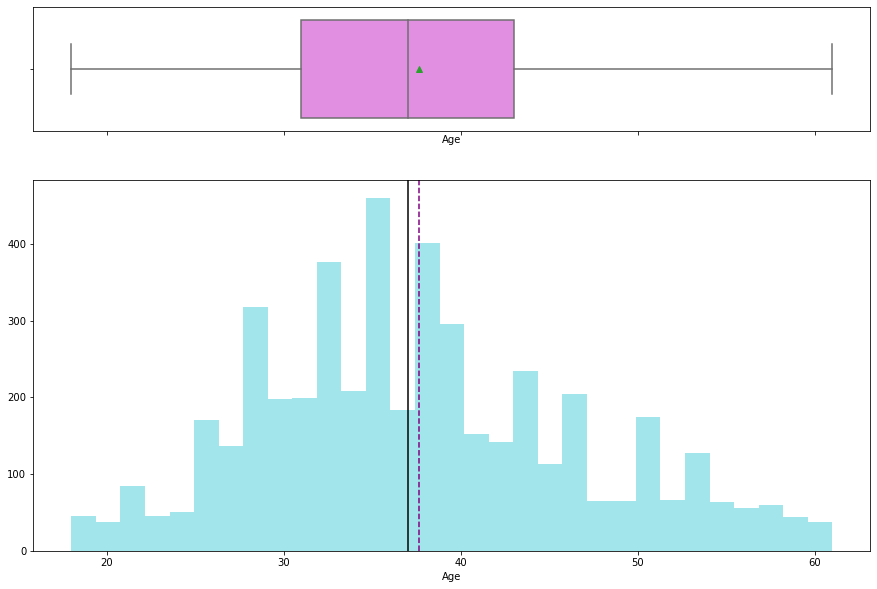

In [194]:
histogram_boxplot(df["Age"])

Age is normally distributed. Mean and Median is almost the same, close to 37. There are no outliers

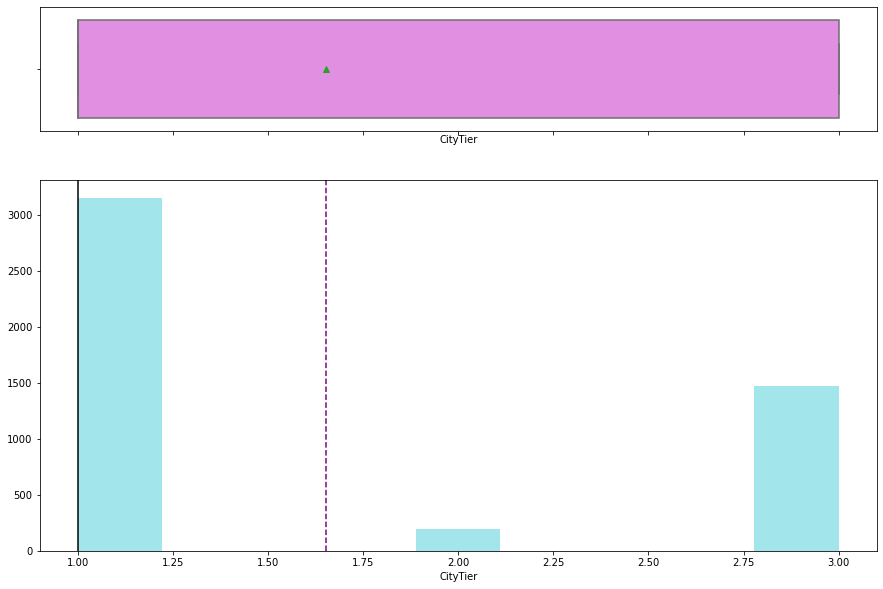

In [195]:
histogram_boxplot(df["CityTier"])

`CityTier` is also normally distributed and no outliers

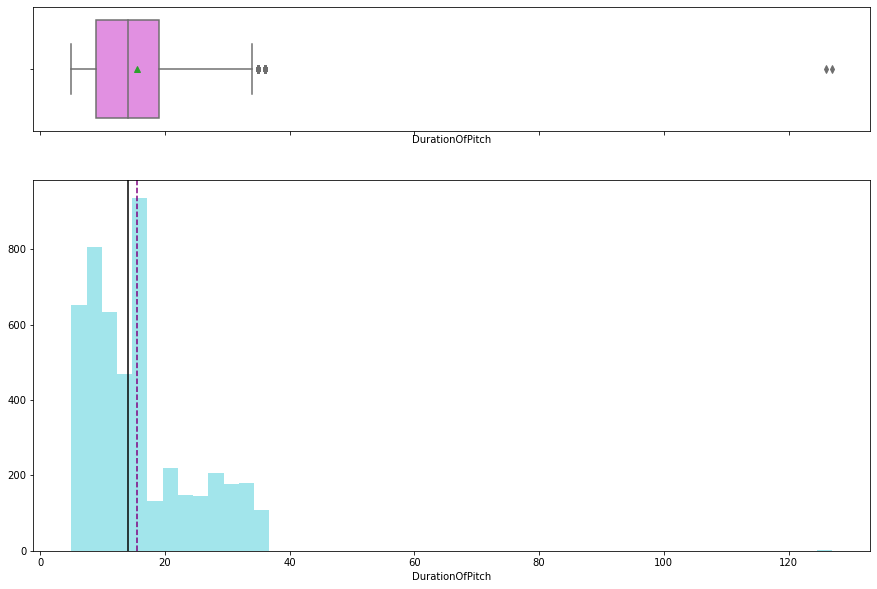

In [196]:
histogram_boxplot(df["DurationOfPitch"])

`DurationofPitch` is right skewed and there are few outliers to the right.

In [197]:
df[(df.DurationOfPitch > 60)]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1434,201434,0,37.622265,Company Invited,3,126.0,Salaried,Male,2,3.0,Basic,3.0,Married,3.0,0,1,1,1.0,Executive,18482.0
3878,203878,0,53.000000,Company Invited,3,127.0,Salaried,Male,3,4.0,Basic,3.0,Married,4.0,0,1,1,2.0,Executive,22160.0


Those outliers does not seem like a data entry error

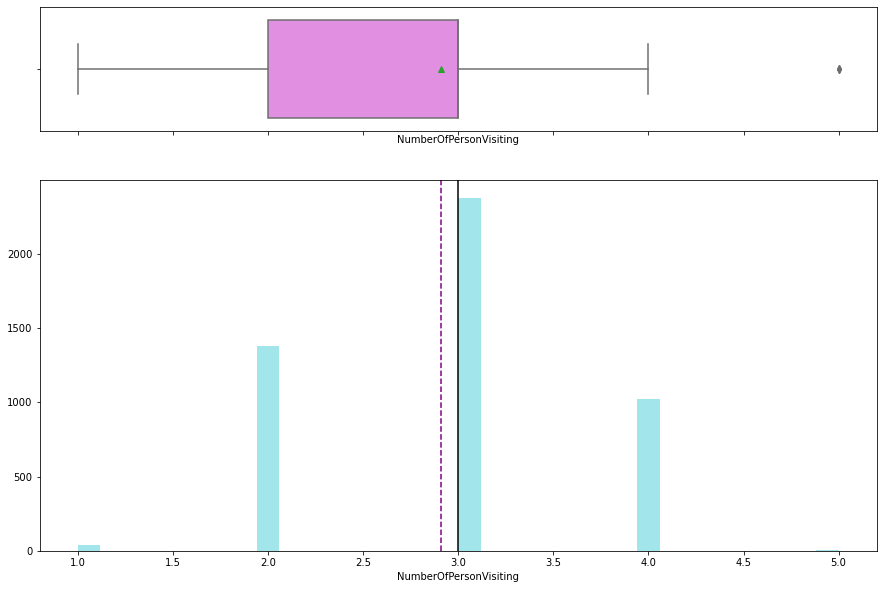

In [198]:
histogram_boxplot(df["NumberOfPersonVisiting"])

In [199]:
df['NumberOfPersonVisiting'].unique()

array([3, 2, 1, 4, 5], dtype=int64)

`NumberOfPersonVisiting` - There is an outlier to the right. But the unique value shows within the range.

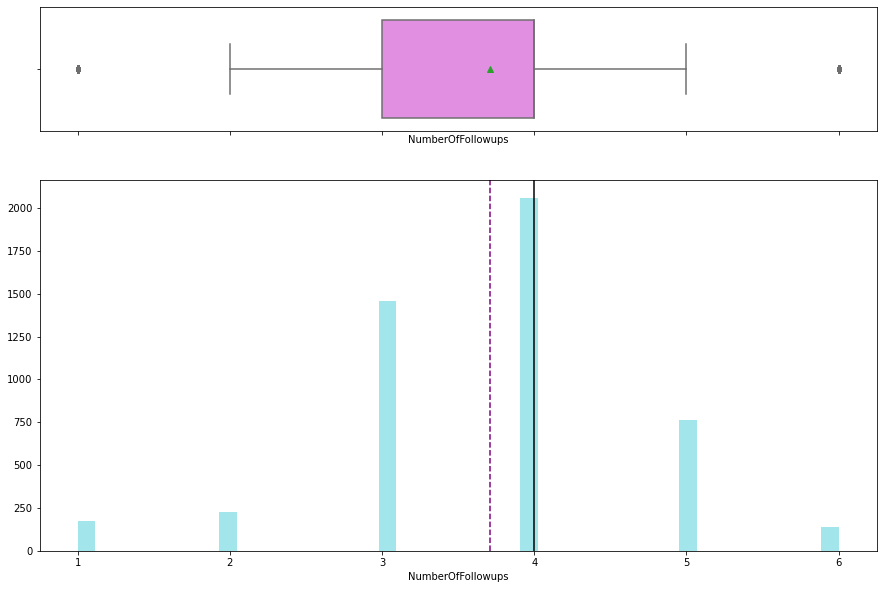

In [200]:
histogram_boxplot(df["NumberOfFollowups"])

Chart shows outliers on both sides but the values are within the range

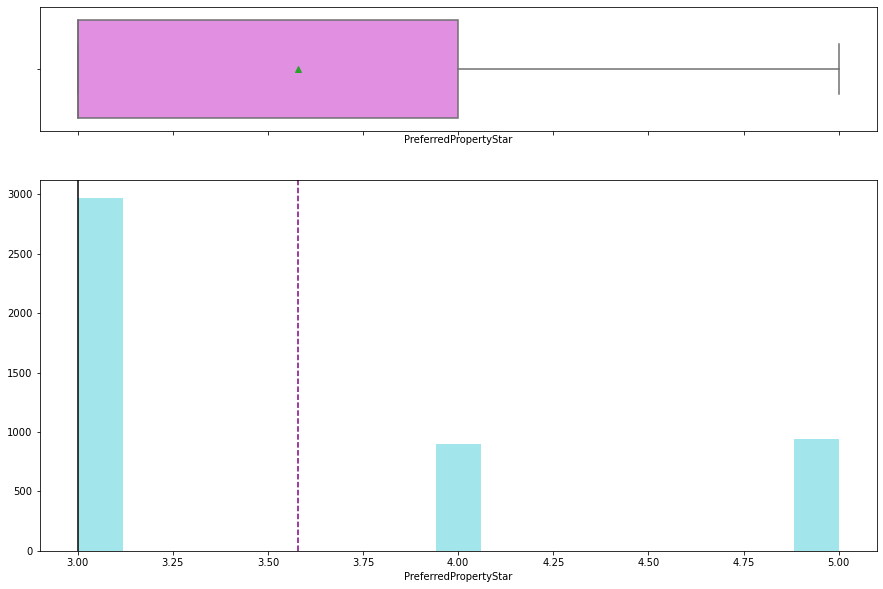

In [201]:
histogram_boxplot(df["PreferredPropertyStar"])

`PreferredPropertyStar` is right skewed. Only few customers preferred 5 star properties

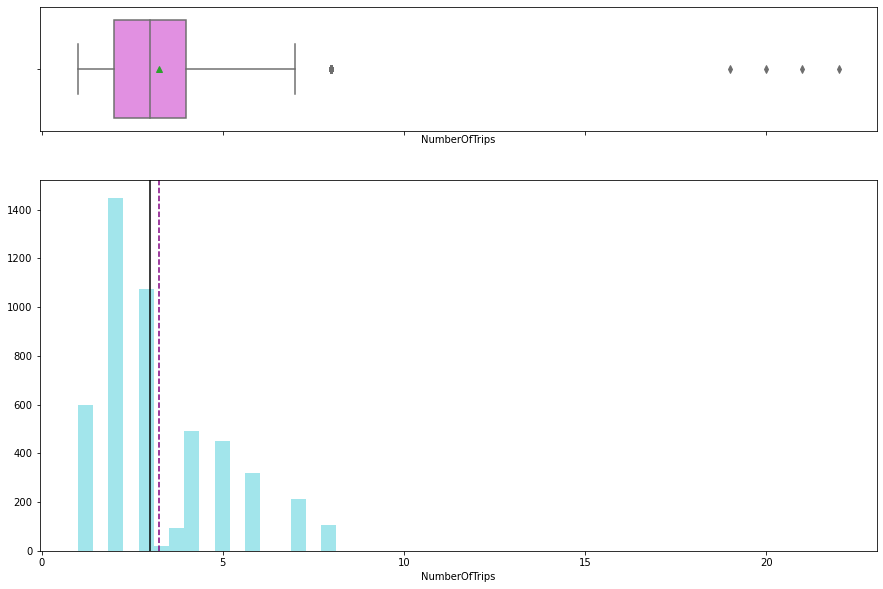

In [202]:
histogram_boxplot(df["NumberOfTrips"])

`NumberOfTrips` is right skewed and there are outliers to the right. Upto 75% it's only 4 trips among the customers. 

In [203]:
df[(df.NumberOfTrips > 10)]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
385,200385,1,30.0,Company Invited,1,10.0,Large Business,Male,2,3.0,Basic,3.0,Single,19.0,1,4,1,1.0,Executive,17285.0
816,200816,0,39.0,Company Invited,1,15.0,Salaried,Male,3,3.0,Deluxe,4.0,Unmarried,21.0,0,2,1,0.0,Manager,21782.0
2829,202829,1,31.0,Company Invited,1,11.0,Large Business,Male,3,4.0,Basic,3.0,Single,20.0,1,4,1,2.0,Executive,20963.0
3260,203260,0,40.0,Company Invited,1,16.0,Salaried,Male,4,4.0,Deluxe,4.0,Unmarried,22.0,0,2,1,1.0,Manager,25460.0


`NumberOfTrips` greater than 10 are male customers, either single or unmarried, they owncar, and either executive or manager. It seems to me an outlier that needs to be treated

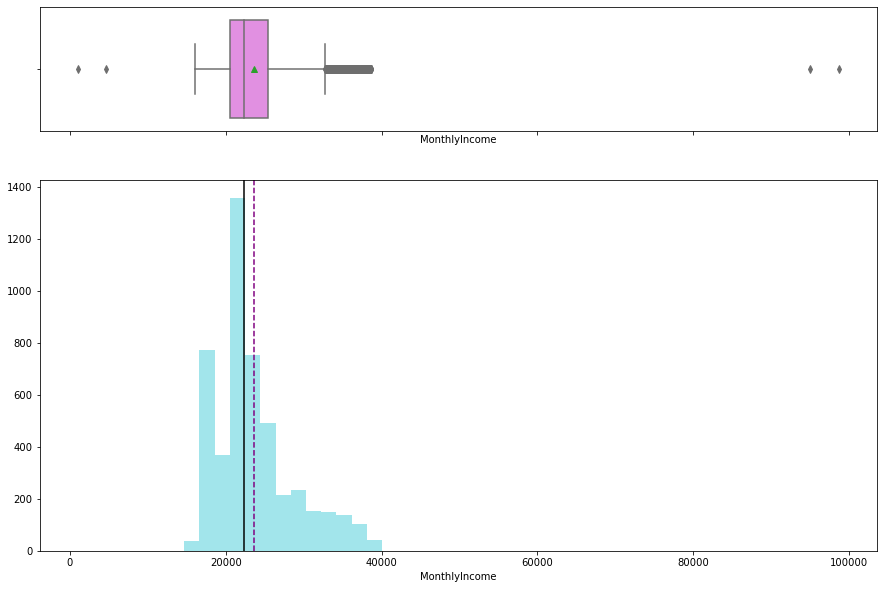

In [204]:
histogram_boxplot(df["MonthlyIncome"])

`MonthlyIncome` is right skewed with outliers on both sides

In [205]:
df[(df.MonthlyIncome > 40000) | (df.MonthlyIncome < 5000 )]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
38,200038,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,3.0,Divorced,1.0,1,2,1,0.0,Executive,95000.0
142,200142,0,38.0,Self Enquiry,1,9.0,Large Business,Female,2,3.0,Deluxe,3.0,Single,4.0,1,5,0,0.0,Manager,1000.0
2482,202482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,5.0,Divorced,2.0,1,2,1,1.0,Executive,98678.0
2586,202586,0,39.0,Self Enquiry,1,10.0,Large Business,Female,3,4.0,Deluxe,3.0,Single,5.0,1,5,0,1.0,Manager,4678.0


`MonthlyIncome` less than 5000 are managers and `MonthlyIncome` greater than 40000 are executives. so, it does not seem like a data entry error

### 5.2 Bivariate Analysis

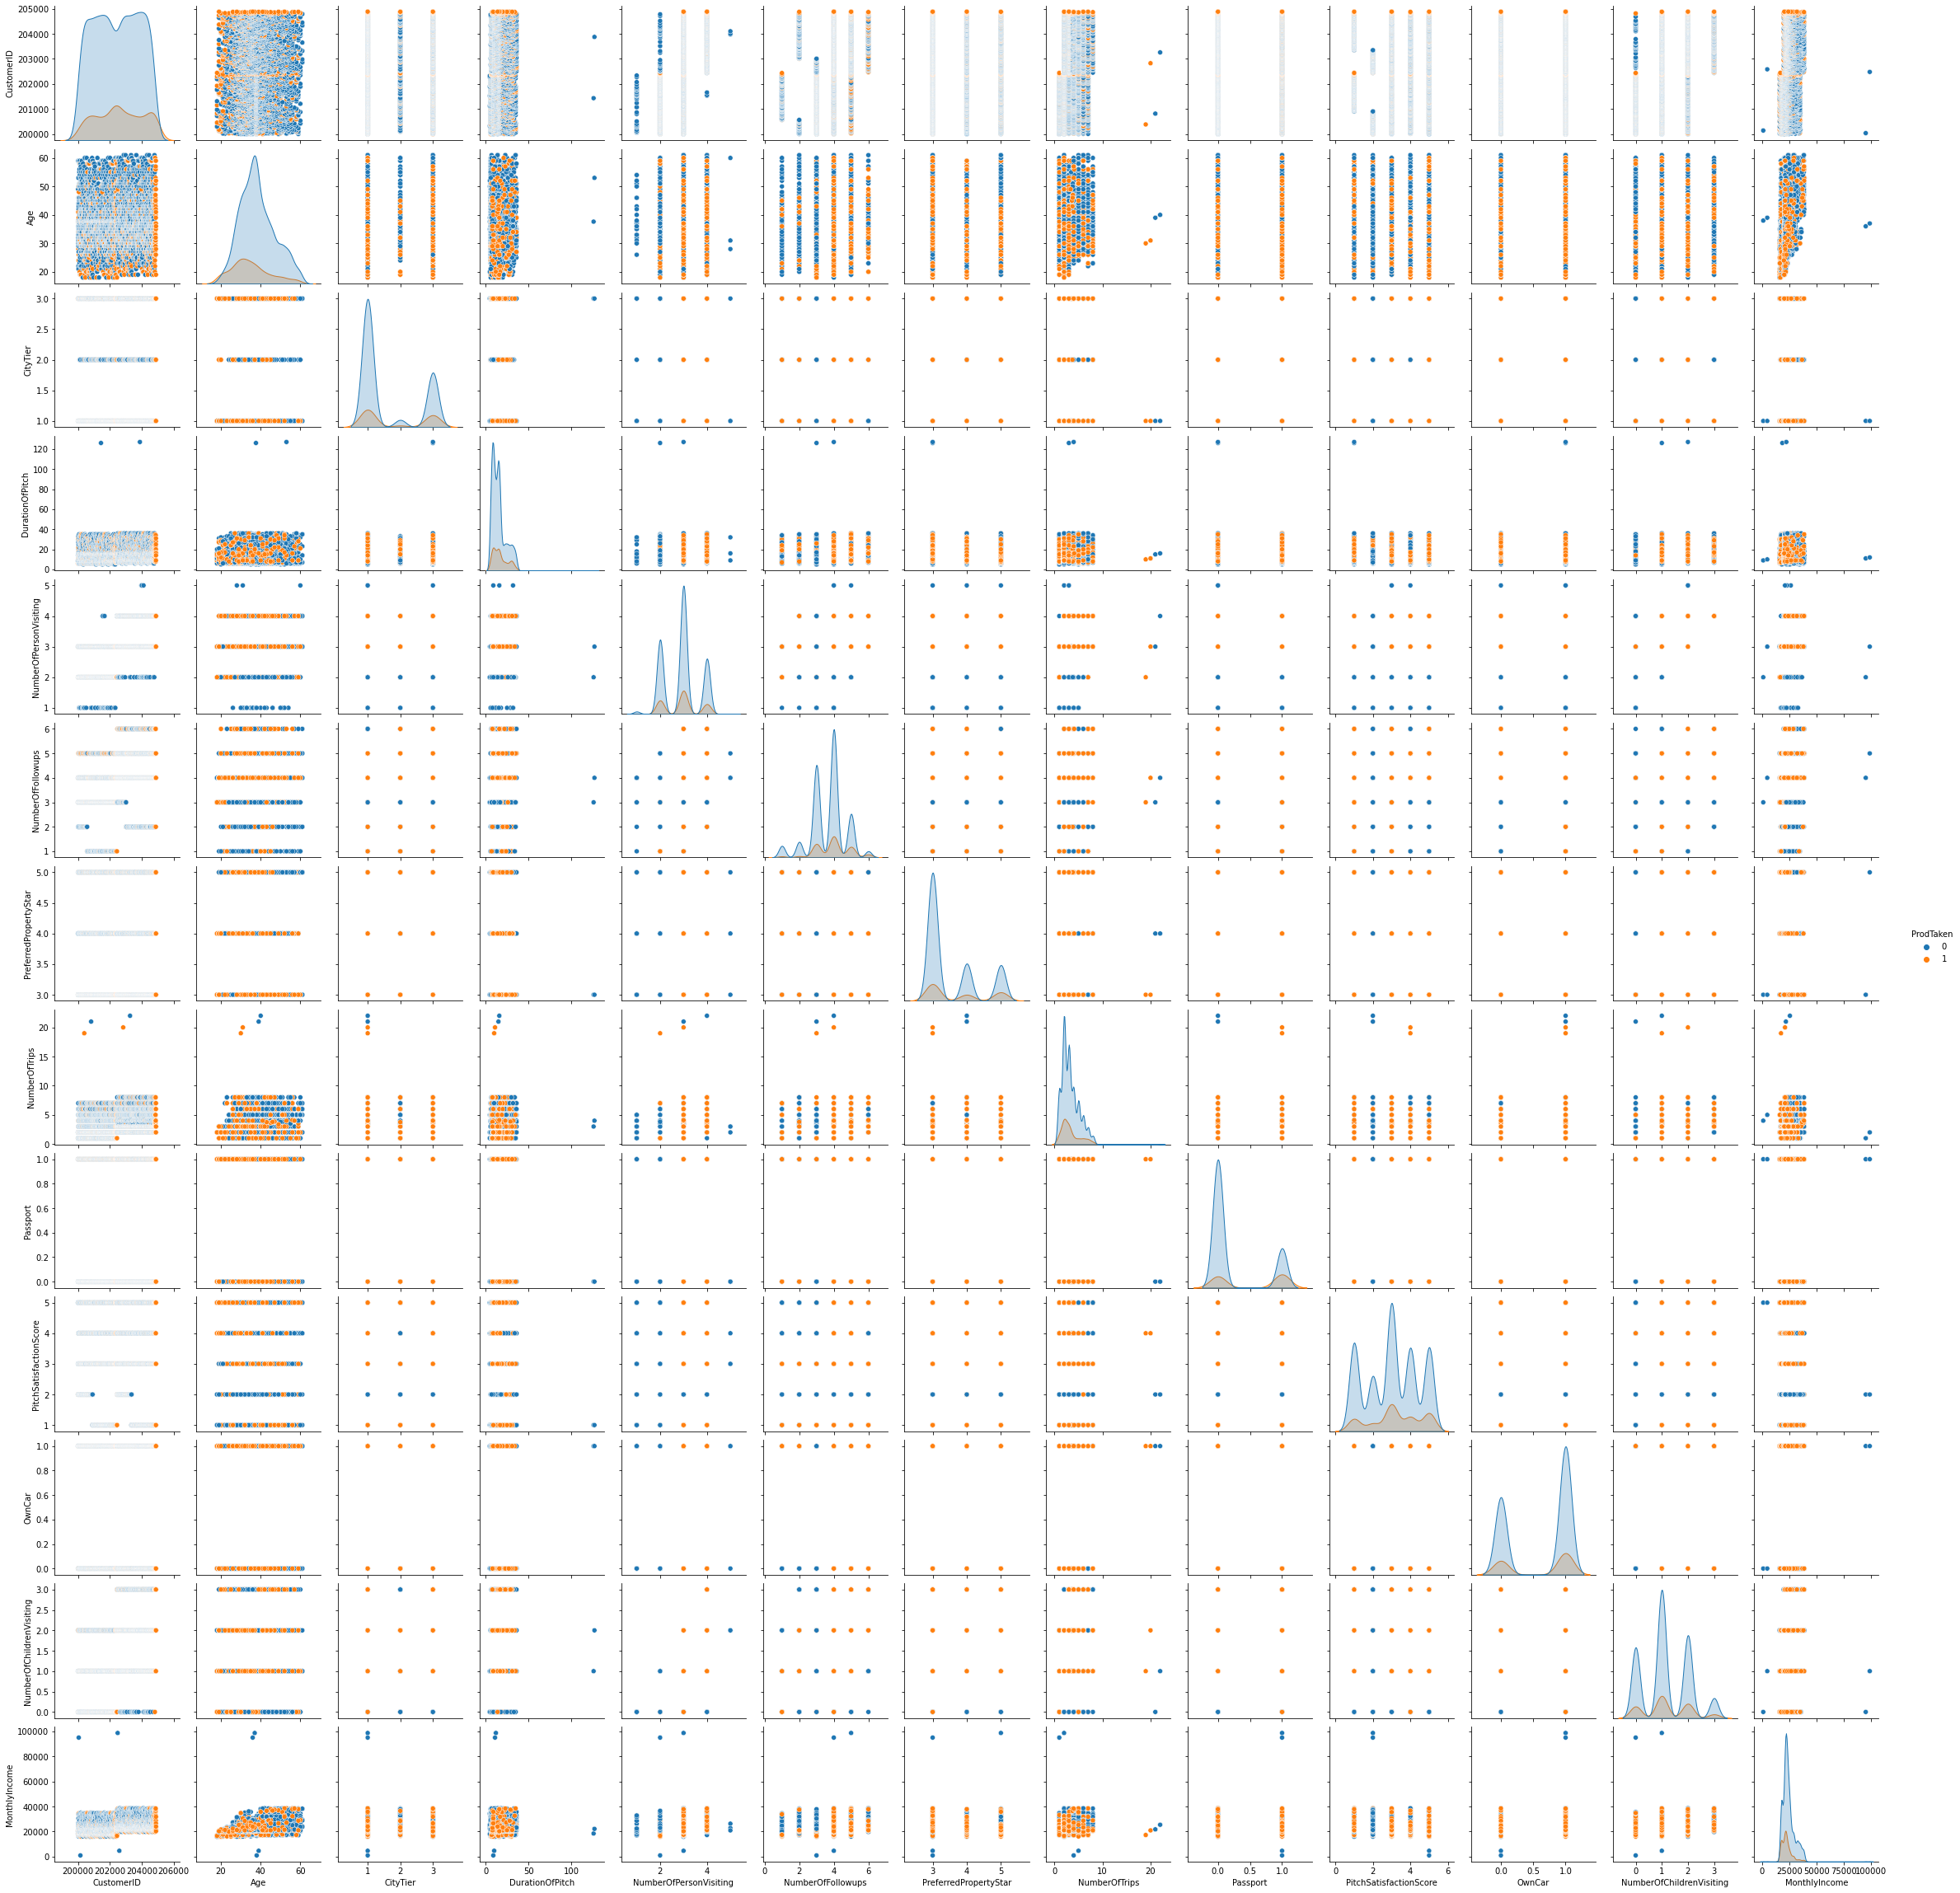

In [206]:
sns.pairplot(df, hue="ProdTaken")
plt.show()

* There are varying distributions in variables for prodtaken, we should investigate it further.

In [207]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,df['ProdTaken'],margins=True)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,df['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

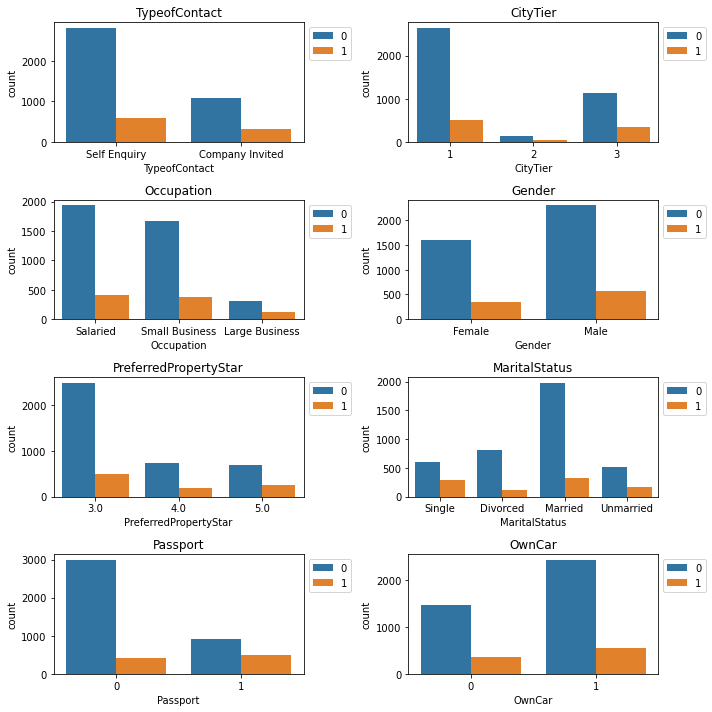

In [208]:
cols = df[['TypeofContact','CityTier','Occupation','Gender','PreferredPropertyStar','MaritalStatus','Passport','OwnCar']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(4,2,i+1)
                     sns.countplot(df[variable],hue=df['ProdTaken'])
                     plt.tight_layout()
                     plt.legend(loc="upper left", bbox_to_anchor=(1,1))
                     plt.title(variable)
plt.show()

* Data suggests that customers making self-enquiry have higher chance of purchasing package than company invited contact
* Tier 1 and 3 city customers have purchased more travel packages compare to tier 2 city customers. But in percentage terms tier 2 & 3 have purchased more than tier 1.
* Customers owning passport, have higher likelyhood of buying travel package
* Same trend with customers owning car as well. Customers own car have purchased more travel packages
* I don't see marital status being a major influencer in customers buying travel package. But single and married have purchased more.
* There are higher number of customers who have bought travel package also happen to prefer 3 star properties
* Male customers have taken more travel packages compared to female customers

<AxesSubplot:xlabel='CityTier', ylabel='Age'>

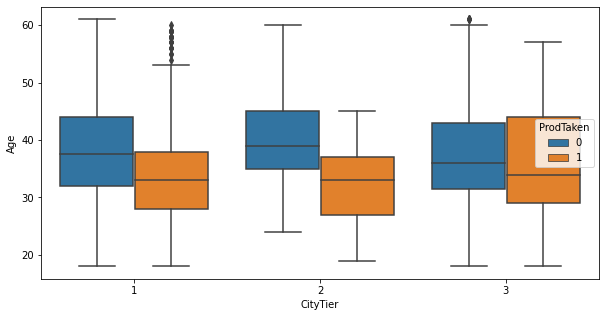

In [209]:
plt.figure(figsize=(10,5))
sns.boxplot(x="CityTier",y="Age",hue="ProdTaken", data = df)

The above chart shows that customers from tier 3 city with age falling between 30 and 40 have higher chance of taking travel package

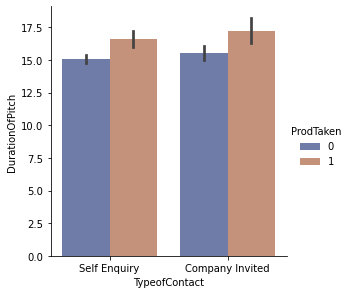

In [210]:
sns.catplot(
    data=df, kind="bar",
    x="TypeofContact", y="DurationOfPitch", hue="ProdTaken",
    palette="dark", alpha=.6, height=4)

Data indicate that company invited contact with higher duration of pitch have higher likelyhood of customer purchasing the travel package.

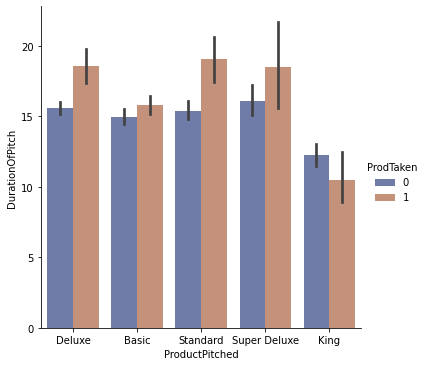

In [211]:
sns.catplot(
    data=df, kind="bar",
    x="ProductPitched", y="DurationOfPitch", hue="ProdTaken",
    palette="dark", alpha=.6, height=5)

Longer duration of pitch in general have higher chance of purchases, especially if the product targetted is for Deluxe, Standard and Super Deluxe

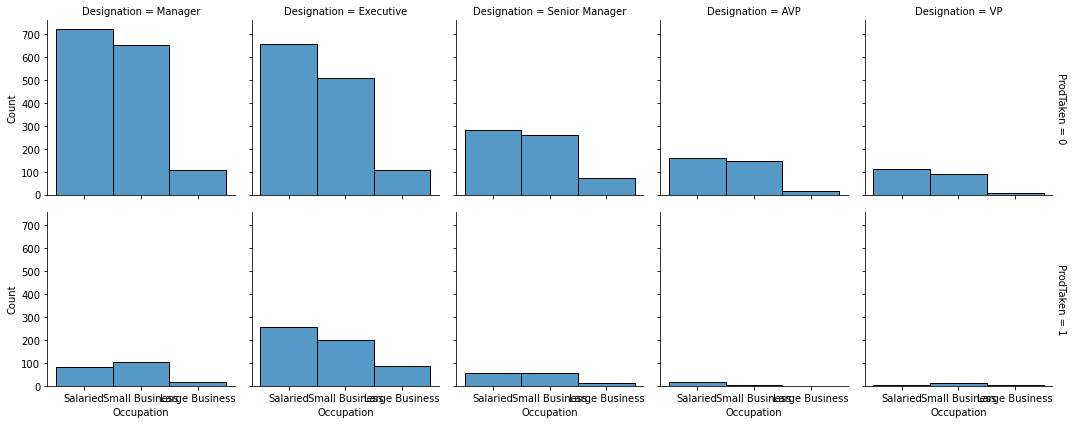

In [212]:
sns.displot(
    df, x="Occupation", col="Designation", row="ProdTaken",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True))

Executive with salaried occupation have purchased more packages. Second highest is the manager designation.

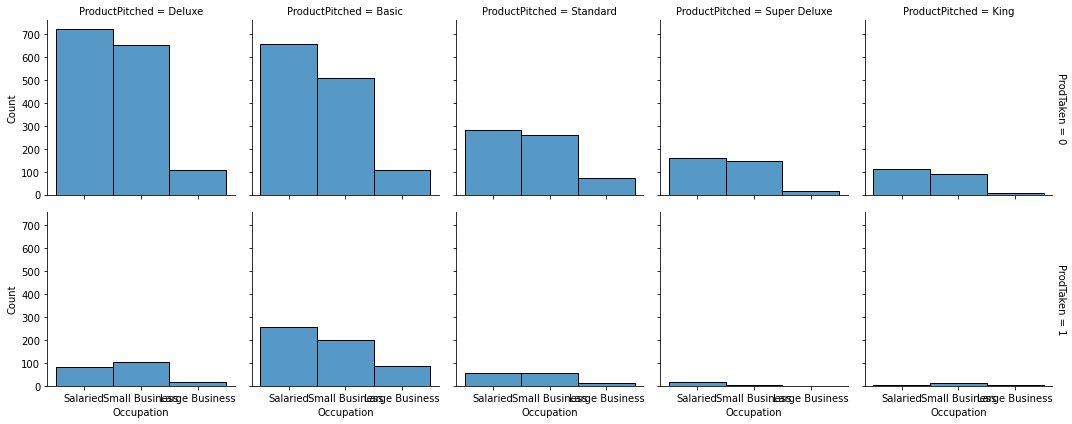

In [213]:
sns.displot(
    df, x="Occupation", col="ProductPitched", row="ProdTaken",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True))

In general, product purchased customers falls under salaried occupation category with basic package.

<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

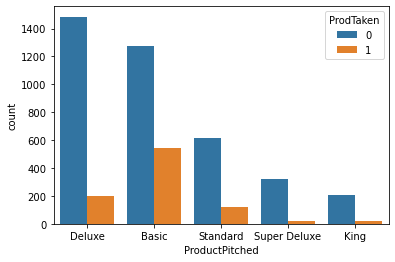

In [214]:
sns.countplot(x="ProductPitched", hue="ProdTaken", data=df)

There more customers who have taken the basic travel package compared to other products pitched

<AxesSubplot:xlabel='NumberOfFollowups', ylabel='count'>

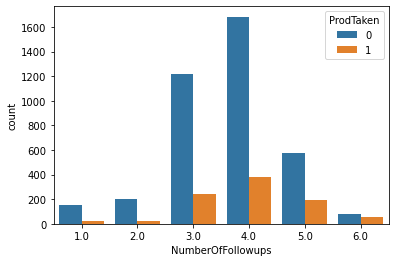

In [215]:
sns.countplot(x="NumberOfFollowups", hue="ProdTaken", data=df)

Customers tend to buy the package at around 3 to 5 followps

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

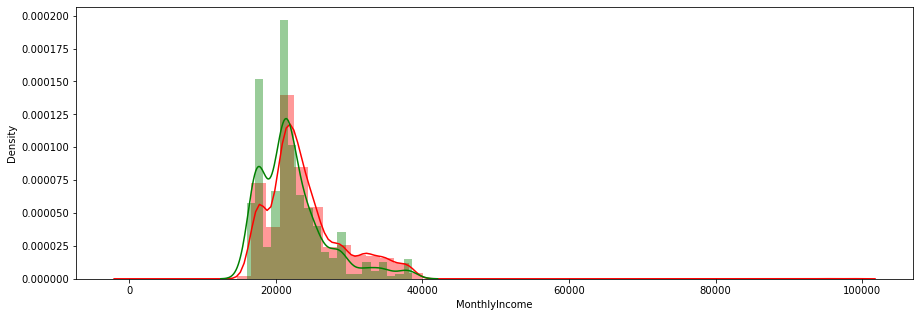

In [216]:
plt.figure(figsize=(15,5))

sns.distplot( df[df.ProdTaken == 0]['MonthlyIncome'], color = 'r')
sns.distplot( df[df.ProdTaken == 1]['MonthlyIncome'], color = 'g')

Above graph shows customers who have purchased package and who have not purchased both fall under the same income category. However, there are more customers who have purchased the package who happen to fall between 20000 and 25000 monthly income range.

# 6.<a id = "link5"></a> Outlier Treatment

### 6.1 Detecting Outliers
* `DurationofPitch`, `NumberofTrips`, `Numberoffollowups` and `monthlyincome` have outliers in the data. However from the above analysis all the features except `Numeroftrips`are correctly entered or measured data. Hence, does not need to be treated. `Numberoftrips` have outliers that need to be treated

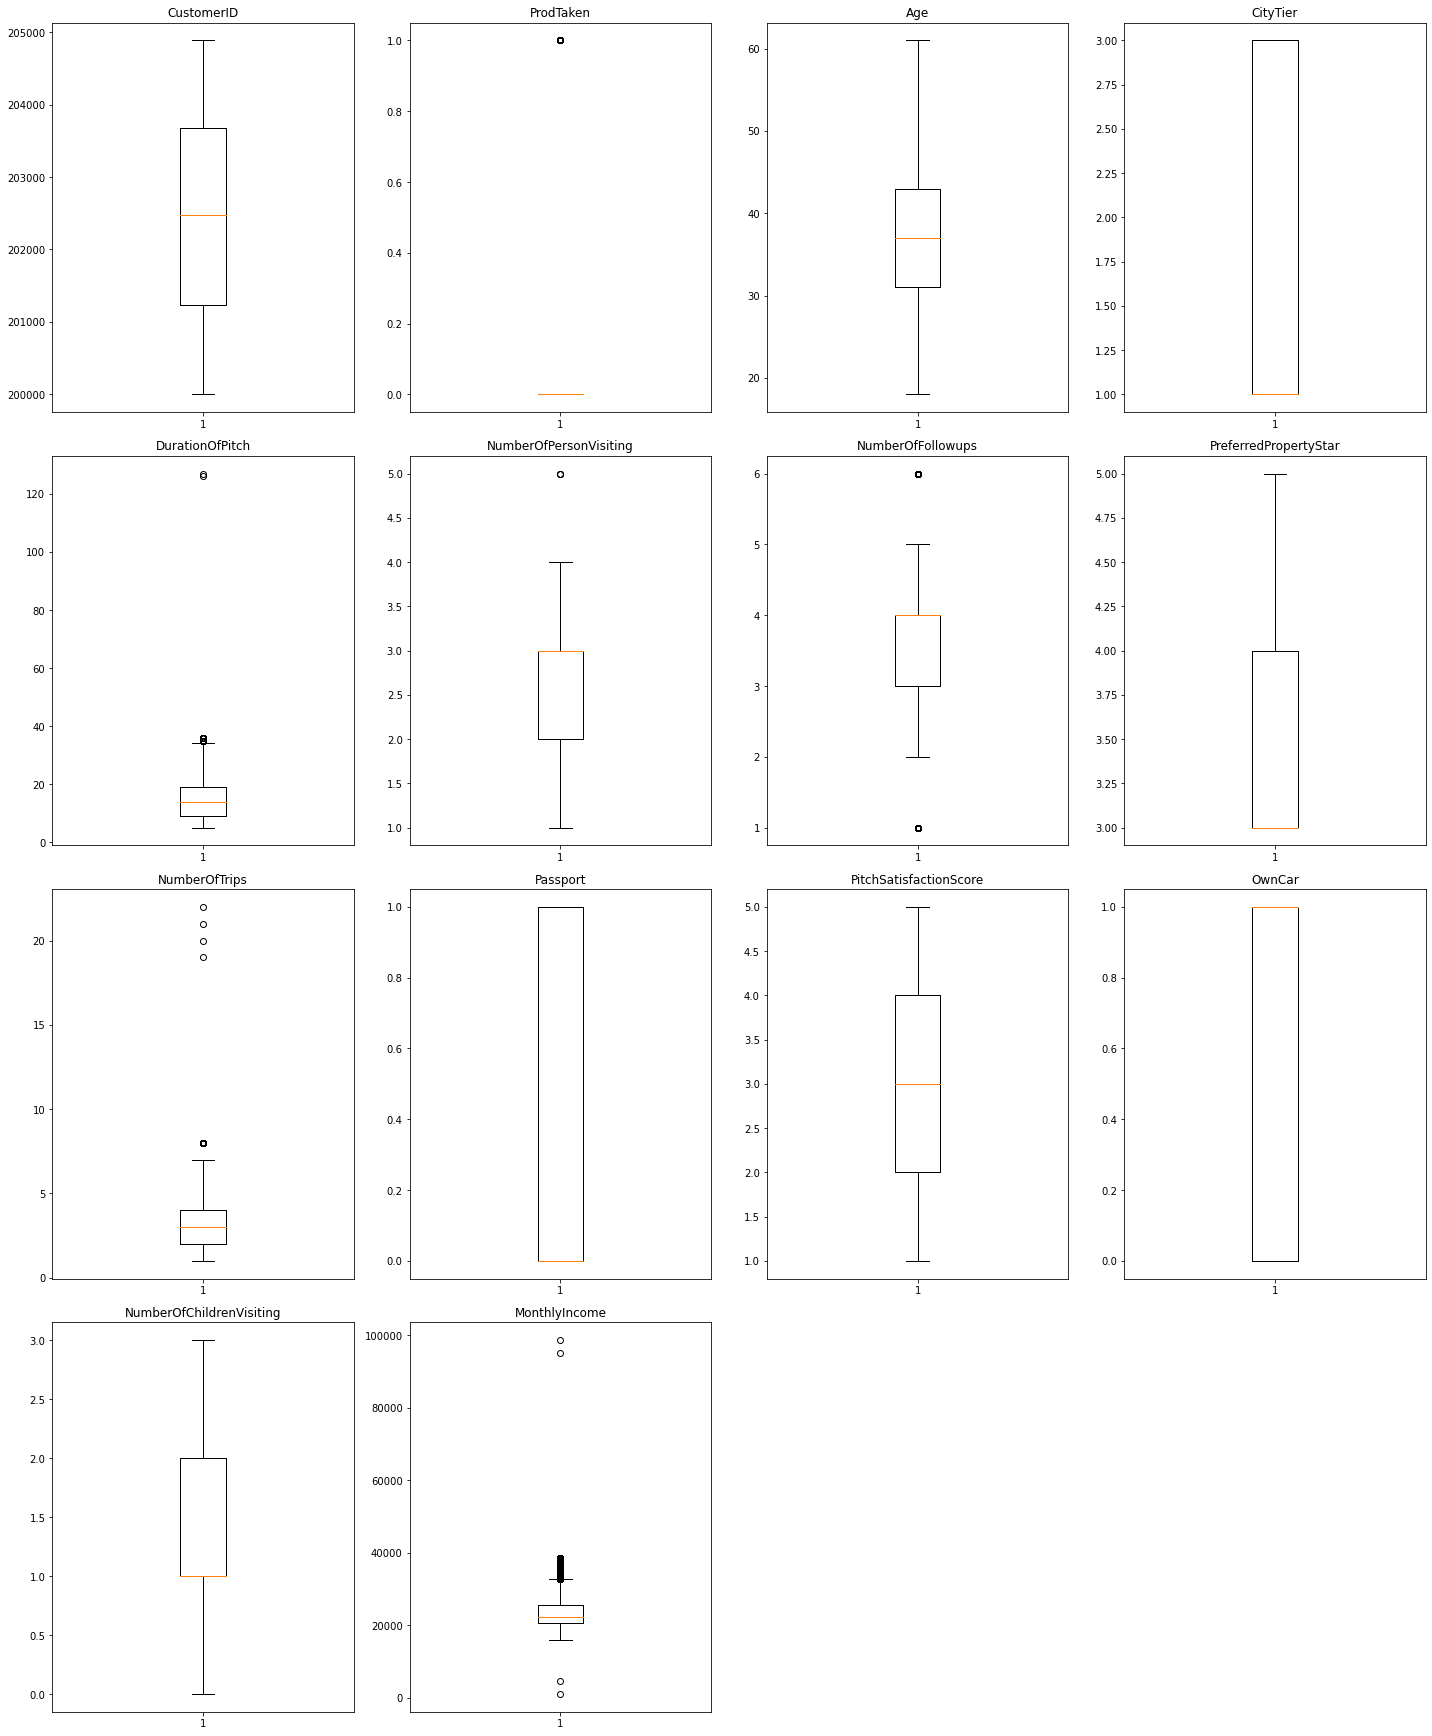

In [217]:
# outlier detection using boxplot
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

### 6.2 Treating outliers
* All the values smaller than the lower whisker will be assigned the value of the lower whisker, and all the values above the upper whisker will be assigned the value of the upper whisker.

In [218]:
def treat_outliers(data,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    data: data frame
    col: name of the column
    '''
    Q1=data[col].quantile(0.25) # 25th quantile
    Q3=data[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker) # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whisker will be assigned value of upper_Whisker 
    return data

def treat_outliers_all(data, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    data: data frame
    '''
    for c in col_list:
        data = treat_outliers(data,c)
        
    return data
    

Treating the outliers for only `NumberofTrips` column

In [219]:
numerical_col = ['NumberOfTrips']
data = treat_outliers_all(df,numerical_col)

### 6.3 Data type conversion

There are no decimal values in `Age` column so, we can convert it to int from float. Other object columns can be converted to category

In [220]:
df['Age'] = df['Age'].astype('int')
df['TypeofContact'] = df['TypeofContact'].astype('category').cat.codes
df['Occupation'] = df['Occupation'].astype('category').cat.codes
df['Gender'] = df['Gender'].astype('category').cat.codes
df['ProductPitched'] = df['ProductPitched'].astype('category').cat.codes
df['MaritalStatus'] = df['MaritalStatus'].astype('category').cat.codes
df['Designation'] = df['Designation'].astype('category').cat.codes

# 7. <a id = "link6"></a>Model Building

### 7.1 Approach
1. Split the data into train and test set.
2. Train models on the training data.
3. Try to improve the model performance using hyperparaneter tuning.
4. Test the performance on the test data.

### 7.2 Split data into train and test

In [221]:
#dropping ID and numberofchildrenvisiting columns from the input.
#Since numberofchildrenvisiting have high correlation with numberofpersonvisiting, I chose to drop one of those columns

X = df.drop(['ProdTaken','CustomerID', 'NumberOfChildrenVisiting'], axis=1)
y = df['ProdTaken']

X = pd.get_dummies(X,drop_first=True)

#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state = 1, stratify=y)
print(X_train.shape, X_test.shape)

(3371, 17) (1445, 17)


**The Stratify arguments maintains the original distribution of classes in the target variable while splitting the data into train and test sets.**

### 7.3 Model evaluation criterion

#### Model can make wrong predictions as:
1. Predicting a customer will buy a travel package but actually the customer did not buy(Type 1 Error)
2. Predicting a customer will not buy a travel package but actually, the customer did buy(Type 2 Error)

#### Which case is more important? 
* Both the cases are important as cost of being wrong is high:

* If we predict a customer will buy travel package but actually the customer did not buy then the travel company has targetted the wrong customers.

* If we predict a customer will not buy travel package but actually the customer did buy, then the travel company has failed to identify a potential customer which will be a big loss.

#### How to reduce this loss i.e need to reduce both False Negatives and False Positives?
*  `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

### 7.4 Create function to calculate the confusion matrix and performance metrics

In [222]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_f1, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1-Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1-Score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [223]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# 8. <a id = "link7"></a>Bagging Models

### 8.1 Decision Tree Classifier

Accuracy on training set :  1.0
Accuracy on test set :  0.9065743944636678
Recall on training set :  1.0
Recall on test set :  0.6985294117647058
Precision on training set :  1.0
Precision on test set :  0.7818930041152263
F1-Score on training set :  1.0
F1-Score on test set :  0.7378640776699029


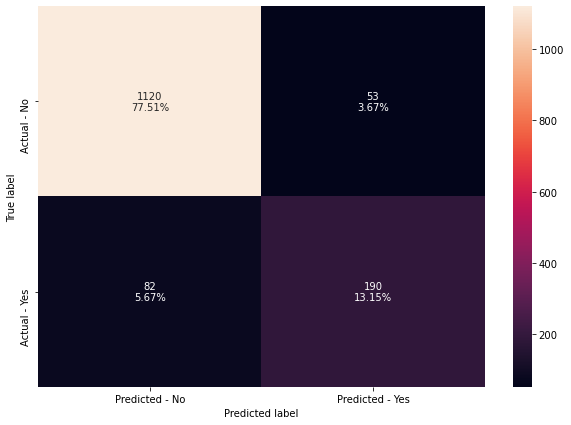

In [224]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(d_tree)

#Creating confusion matrix
make_confusion_matrix(d_tree,y_test)

* Decision tree is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

### 8.2 Hyperparameter Tuning

In [225]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.18,1:0.72},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.72}, max_depth=5,
                       max_leaf_nodes=10, min_impurity_decrease=0.0001,
                       random_state=1)

Accuracy on training set :  0.7887867101750222
Accuracy on test set :  0.7937716262975778
Recall on training set :  0.6677165354330709
Recall on test set :  0.5882352941176471
Precision on training set :  0.45837837837837836
Precision on test set :  0.4624277456647399
F1-Score on training set :  0.5435897435897435
F1-Score on test set :  0.5177993527508091


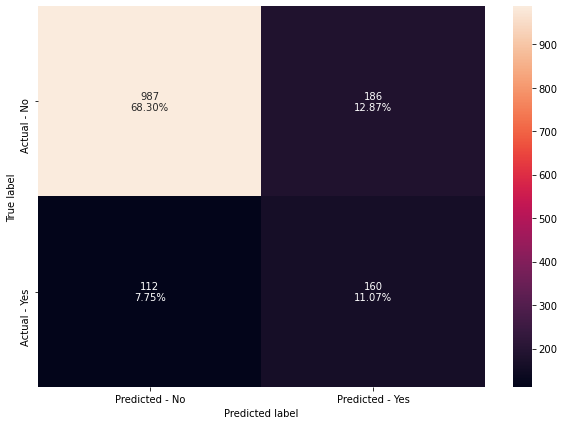

In [226]:
get_metrics_score(dtree_estimator)

make_confusion_matrix(dtree_estimator,y_test)

* The overfitting has reduced but the test f1-score has also decreased significantly
* Let's try some other models.

### 8.3 Random Forest Classifier

Accuracy on training set :  1.0
Accuracy on test set :  0.9176470588235294
Recall on training set :  1.0
Recall on test set :  0.5992647058823529
Precision on training set :  1.0
Precision on test set :  0.9421965317919075
F1-Score on training set :  1.0
F1-Score on test set :  0.7325842696629213


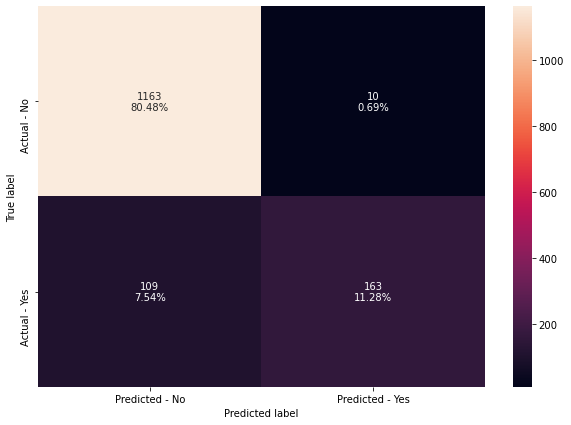

In [227]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(rf_estimator)

#Creating confusion matrix
make_confusion_matrix(rf_estimator,y_test)

* Random forest is giving same test f1-score as decision trees. It is also overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

### 8.4 Hyperparameter Tuning

In [228]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,50,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_depth=15,
                       max_features=None, min_samples_split=7, n_estimators=40,
                       oob_score=True, random_state=1)

Accuracy on training set :  0.9952536339365173
Accuracy on test set :  0.9155709342560554
Recall on training set :  0.9952755905511811
Recall on test set :  0.6691176470588235
Precision on training set :  0.9798449612403101
Precision on test set :  0.8504672897196262
F1-Score on training set :  0.9874999999999999
F1-Score on test set :  0.7489711934156379


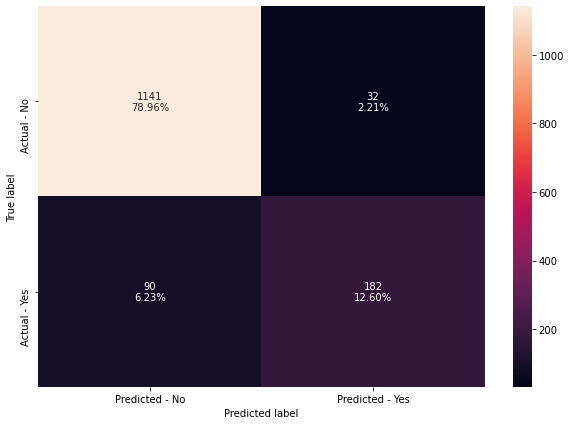

In [229]:
#Calculating different metrics
get_metrics_score(rf_tuned)

#Creating confusion matrix
make_confusion_matrix(rf_tuned,y_test)

* The overfitting has reduced significantly and the model performance has improved.
* The test recall and test f1-score has increased.

### 8.5 Bagging Classifier

Accuracy on training set :  0.995550281815485
Accuracy on test set :  0.9190311418685121
Recall on training set :  0.9763779527559056
Recall on test set :  0.6433823529411765
Precision on training set :  1.0
Precision on test set :  0.8974358974358975
F1-Score on training set :  0.9880478087649402
F1-Score on test set :  0.7494646680942184


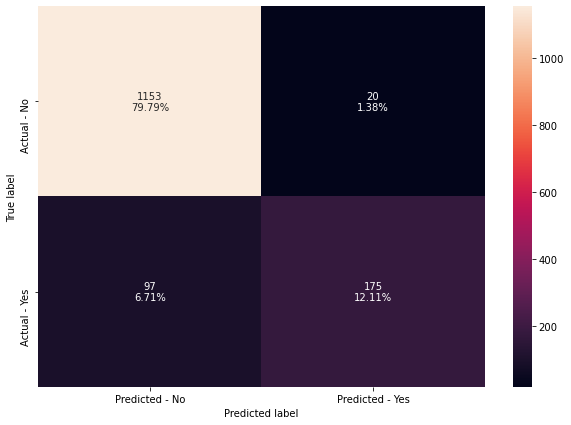

In [230]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(bagging_classifier)

#Creating confusion matrix
make_confusion_matrix(bagging_classifier,y_test)

* Bagging classifier is overfiiting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

### 8.6 Hyperparameter Tuning

In [231]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

Accuracy on training set :  0.999110056363097
Accuracy on test set :  0.9301038062283737
Recall on training set :  0.9952755905511811
Recall on test set :  0.6544117647058824
Precision on training set :  1.0
Precision on test set :  0.9621621621621622
F1-Score on training set :  0.9976322020520915
F1-Score on test set :  0.7789934354485777


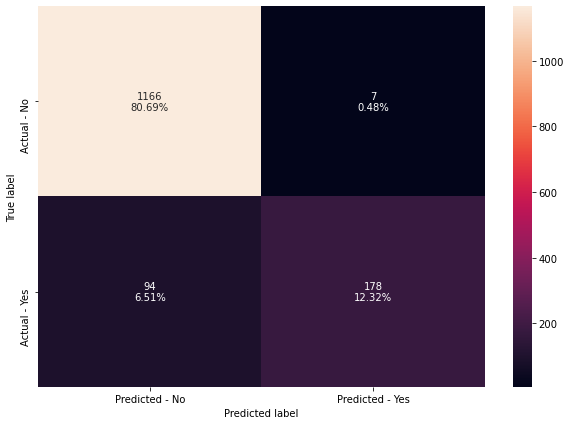

In [232]:
#Calculating different metrics
get_metrics_score(bagging_estimator_tuned)

#Creating confusion matrix
make_confusion_matrix(bagging_estimator_tuned,y_test)

* Accuracy and F1 score improved after hyperparameter tuning.
* Let's try other boosting models.

# 9. <a id = "link8"></a>Boosting Models

### 9.1 AdaBoost Classifier

Accuracy on training set :  0.8481162859685554
Accuracy on test set :  0.8394463667820069
Recall on training set :  0.3543307086614173
Recall on test set :  0.2867647058823529
Precision on training set :  0.6880733944954128
Precision on test set :  0.6724137931034483
F1-Score on training set :  0.46777546777546775
F1-Score on test set :  0.40206185567010305


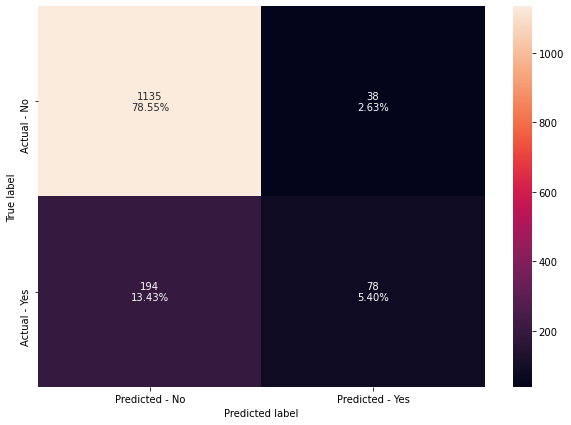

In [233]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(ab_classifier)

#Creating confusion matrix
make_confusion_matrix(ab_classifier,y_test)

* Adaboost is giving more generalized performance than previous models but the test f1-score is too low. 

### Hyperparameter Tuning

In [234]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,50,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.2000000000000002, n_estimators=40,
                   random_state=1)

Accuracy on training set :  0.928211213289825
Accuracy on test set :  0.8394463667820069
Recall on training set :  0.7259842519685039
Recall on test set :  0.47794117647058826
Precision on training set :  0.8714555765595463
Precision on test set :  0.5909090909090909
F1-Score on training set :  0.7920962199312714
F1-Score on test set :  0.5284552845528456


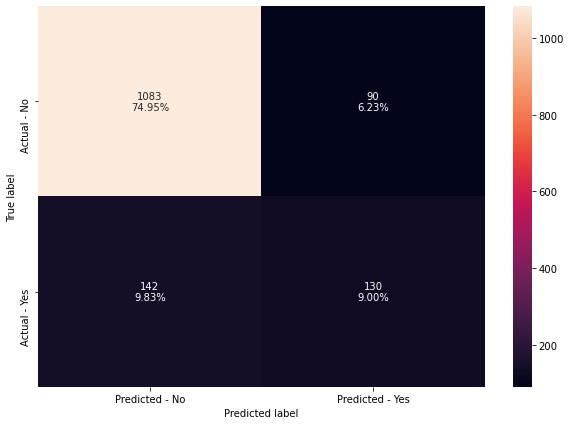

In [235]:
#Calculating different metrics
get_metrics_score(abc_tuned)

#Creating confusion matrix
make_confusion_matrix(abc_tuned,y_test)

* The model performance has increased slightly but the model has started to overfit the training data.

### 9.2 Gradient Boosting Classifier

Accuracy on training set :  0.8893503411450608
Accuracy on test set :  0.8629757785467128
Recall on training set :  0.4818897637795276
Recall on test set :  0.36764705882352944
Precision on training set :  0.8742857142857143
Precision on test set :  0.7936507936507936
F1-Score on training set :  0.6213197969543147
F1-Score on test set :  0.5025125628140704


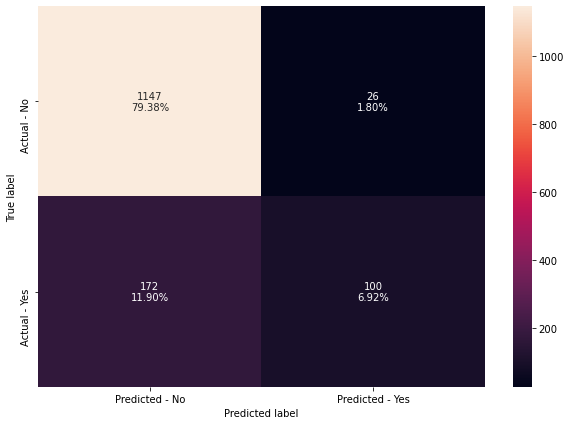

In [236]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(gb_classifier)

#Creating confusion matrix
make_confusion_matrix(gb_classifier,y_test)

* The gradient boosting classifier is giving more generalized performance but the test f1-score is too low. 

### Hyperparameter Tuning

In [237]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=0.8)

Accuracy on training set :  0.9273212696529219
Accuracy on test set :  0.8830449826989619
Recall on training set :  0.6566929133858268
Recall on test set :  0.47058823529411764
Precision on training set :  0.9391891891891891
Precision on test set :  0.8366013071895425
F1-Score on training set :  0.772937905468026
F1-Score on test set :  0.6023529411764706


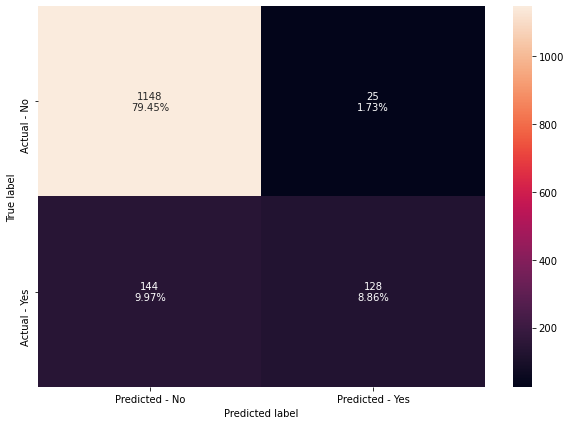

In [238]:
#Calculating different metrics
get_metrics_score(gbc_tuned)

#Creating confusion matrix
make_confusion_matrix(gbc_tuned,y_test)

* Test F1 score has improved. But it is still low

### 9.3 XGBoost Classifier

Accuracy on training set :  0.9997033521210323
Accuracy on test set :  0.9342560553633218
Recall on training set :  0.9984251968503937
Recall on test set :  0.7058823529411765
Precision on training set :  1.0
Precision on test set :  0.927536231884058
F1-Score on training set :  0.9992119779353822
F1-Score on test set :  0.8016701461377871


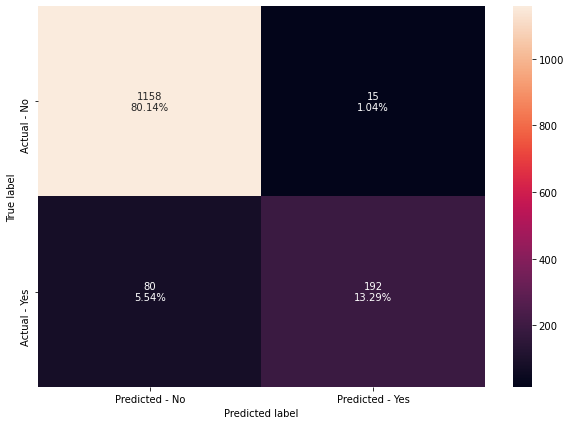

In [239]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(xgb_classifier)

#Creating confusion matrix
make_confusion_matrix(xgb_classifier,y_test)

* Xgboost classifier is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.  

### Hyperparameter Tuning

In [240]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

Accuracy on training set :  0.9830910708988431
Accuracy on test set :  0.9280276816608997
Recall on training set :  0.9968503937007874
Recall on test set :  0.8272058823529411
Precision on training set :  0.9200581395348837
Precision on test set :  0.7978723404255319
F1-Score on training set :  0.9569160997732427
F1-Score on test set :  0.8122743682310468


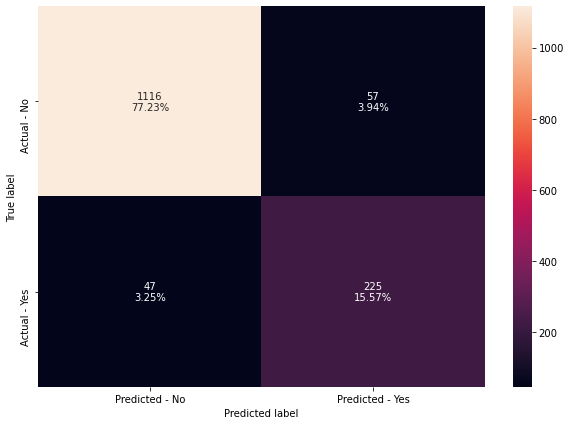

In [241]:
#Calculating different metrics
get_metrics_score(xgb_tuned)

#Creating confusion matrix
make_confusion_matrix(xgb_tuned,y_test)

* The overfitting has reduced slightly but there is not much difference in the model performance.

### 9.4 Stacking Classifier

In [242]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.18,
                                                                     1: 0.82},
                                                       max_depth=15,
                                                       max_features=None,
                                                       min_samples_split=7,
                                                       n_estimators=40,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           n_estimators=250,
                                                    

Accuracy on training set :  0.9715218036191041
Accuracy on test set :  0.9086505190311419
Recall on training set :  0.9984251968503937
Recall on test set :  0.8529411764705882
Precision on training set :  0.869684499314129
Precision on test set :  0.7160493827160493
F1-Score on training set :  0.9296187683284457
F1-Score on test set :  0.7785234899328859


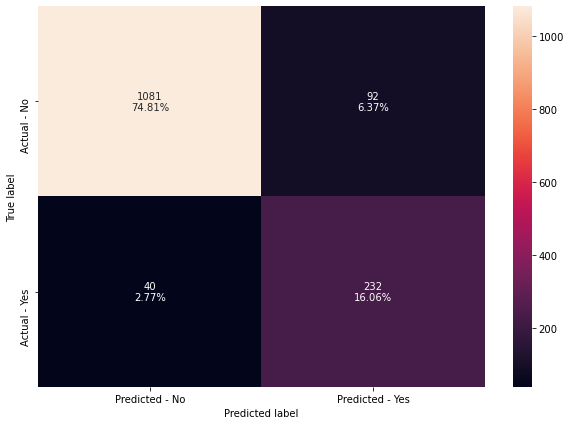

In [243]:
#Calculating different metrics
get_metrics_score(stacking_classifier)

#Creating confusion matrix
make_confusion_matrix(stacking_classifier,y_test)

* The stacking classifier is giving similar performance as compared to XGBoost with slightly less overfitting.
* The confusion matrix shows that the model is able to identify the majority of premium quality wines but it is better at identifying non-premium quality wines.

### Comparing all models

In [244]:
# defining list of models
models = [d_tree, dtree_estimator,rf_estimator, rf_tuned, bagging_classifier,bagging_estimator_tuned,
          ab_classifier, abc_tuned, gb_classifier, gbc_tuned, xgb_classifier,xgb_tuned, stacking_classifier]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [245]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                          'Bagging Classifier','Bagging Classifier Tuned','AdaBoost Classifier','Tuned AdaBoost Classifier',
                                          'Gradient Boosting Classifier', 'Tuned Gradient Boosting Classifier',
                                          'XGBoost Classifier',  'Tuned XGBoost Classifier', 'Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_F1-Score',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
11,Tuned XGBoost Classifier,0.983091,0.928028,0.996850,0.827206,0.920058,0.797872,0.956916,0.812274
10,XGBoost Classifier,0.999703,0.934256,0.998425,0.705882,1.000000,0.927536,0.999212,0.801670
5,Bagging Classifier Tuned,0.999110,0.930104,0.995276,0.654412,1.000000,0.962162,0.997632,0.778993
12,Stacking Classifier,0.971522,0.908651,0.998425,0.852941,0.869684,0.716049,0.929619,0.778523
4,Bagging Classifier,0.995550,0.919031,0.976378,0.643382,1.000000,0.897436,0.988048,0.749465
3,Tuned Random Forest,0.995254,0.915571,0.995276,0.669118,0.979845,0.850467,0.987500,0.748971
0,Decision Tree,1.000000,0.906574,1.000000,0.698529,1.000000,0.781893,1.000000,0.737864
2,Random Forest,1.000000,0.917647,1.000000,0.599265,1.000000,0.942197,1.000000,0.732584
9,Tuned Gradient Boosting Classifier,0.927321,0.883045,0.656693,0.470588,0.939189,0.836601,0.772938,0.602353
7,Tuned AdaBoost Classifier,0.928211,0.839446,0.725984,0.477941,0.871456,0.590909,0.792096,0.528455


* Few models such as decision tree, random forest etc are overfitting the training data in terms of f1-score.
* XGBoost classifier is giving the highest training f1-score and second higest test f1 score but is overfitting the training data.
* The tuned XGBoost has the higest test f1-score and is giving more generalized performance as compared to the XGBoost classifier. 

### Feature importance of Tuned Random Forest

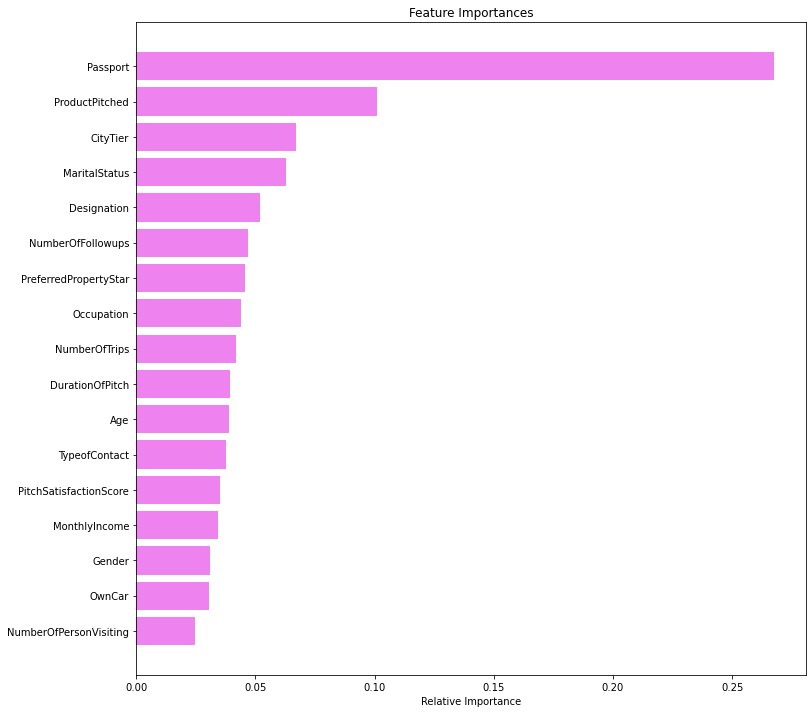

In [246]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Passport is the most important feature in attracting the customer for travel package followed by Designation-executive,  and designation-senior manager.

# 10. <a id = "link9"></a>Insights & Recommendations

- On the basis of our analysis, below are the target audience for effective marketing strategy to gain more customer base for the Wellness Tourism Package.
    - Target customers whom owns `passport`.
    - Customers tend to buy more of `basic or deluxe` travel packages. so, increase focus on these products and complement with the wellness tourism package  
    - Customers from `tier 2 and 3` have the higher likelyhood of buying tourism package. so, need to target these customers more.
    - Marital status of the customer does influence the buying decision. Need to target `married or single` customers as oppose to other marital status
    - Target `executive` designation customers
    - Customer tend to like the `3 star` properties more. So, need to focus on this type of properties when pitching to customers
    - It takes roughly `3 to 5 followups` to get the customers to buy the travel package


- The company should target customers who hold passport, type of product pitched, and what tier city they belong to as these are the most important factors in attracting customers to buy new travel packages. For example, tier 2 and 3 customers have higher chance of buying the travel package as 23% of them have purchased in the past from these tier cities.


* The travel company has to devise a targetted marketing campaign keeping the above predictions in mind to attract more business.Other strategies include as follows:
    1. Send personalized direct mail to the customers
    2. Introduce custom travel package products that caters to the individual customer needs
    3. Offer exceptional customer service to retain the existing customers so that they don't end up going to the competitors
    4. Establish partnerships and nurture relationships by offering free newsletter with helpful advice and tips. By doing 
    this, the travel company can build an email list to build relationships. 

    5. Increase marketing spending and devise targetted marketing campaign to attract more customers for travel package 

    6. Follow Up with existing customers and gain referrals to expand the customer base.